In [8]:
def logistic_function(x):
  """
    Computes the logistic function applied to any value of x.
    Arguments:
    x: scalar or numpy array of any size.
    Returns:
    y: logistic function applied to x.
  """
  import numpy as np
  y = (1 / (1 + np.exp(-x)))
  return y

In [19]:
import numpy as np
def test_logistic_function():
  """
  Test cases for the logistic_function.
  """
  # Test with scalar input
  x_scalar = 0
  expected_output_scalar = round(1 / (1 + np.exp(0)), 3) # Expected output: 0.5
  assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"
  # Test with positive scalar input
  x_pos = 2
  expected_output_pos = round(1 / (1 + np.exp(-2)), 3) # Expected output: ~0.881
  assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"
  # Test with negative scalar input
  x_neg = -3
  expected_output_neg = round(1 / (1 + np.exp(3)), 3) # Expected output: ~0.047
  assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"

  # Test with numpy array input
  x_array = np.array([7, -4, 2])
  expected_output_array = np.array([0.999, 0.018, 0.881]) # Adjusted expected values rounded to 3 decimals
  # Use np.round to round the array element-wise and compare
  assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"
  print("All tests passed!")
# Run the test case
test_logistic_function()


[0.999 0.018 0.881]
All tests passed!


In [20]:
def log_loss(y_true, y_pred):
  """
  Computes log loss for true target value y ={0 or 1} and predicted target value y’ inbetween {0-1}.
  Arguments:
  y_true (scalar): true target value {0 or 1}.
  y_pred (scalar): predicted taget value {0-1}.
  Returns:
  loss (float): loss/error value
  """
  import numpy as np
  # Ensure y_pred is clipped to avoid log(0)
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  loss = (-1) * y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
  return loss

In [22]:
def test_log_loss():
  """
  Test cases for the log_loss function.
  """
  import numpy as np
  # Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
  y_true = 1
  y_pred = 1
  expected_loss = 0.0 # Log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"
  # Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
  y_true = 0
  y_pred = 0
  expected_loss = 0.0 # Log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=0, y_pred=0)"
  # Test case 3: Incorrect prediction (y_true = 1, y_pred = 0)
  y_true = 1
  y_pred = 0
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  # Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)

  y_true = 0
  y_pred = 1
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  # Test case 5: Partially correct prediction
  y_true = 1
  y_pred = 0.8
  expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2))
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"
  y_true = 0
  y_pred = 0.2
  expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"
  print("All tests passed!")
# Run the test case
test_log_loss()

All tests passed!


In [34]:
def cost_function(y_true, y_pred):
  """
  Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
  Args:
  y_true (array_like, shape (n,)): array of true values (0 or 1)
  y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)
  Returns:
  cost (float): nonnegative cost corresponding to y_true and y_pred
  """
  assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
  n = 10000
  loss_vec = np.vectorize(log_loss)
  cost = np.mean(loss_vec(y_true, y_pred))
  return cost

In [36]:
def test_cost_function():
  # Test case 1: Simple example with known expected cost
  y_true = np.array([1, 0, 1])
  y_pred = np.array([0.9, 0.1, 0.8])
  # Expected output: Manually calculate cost for these values
  # log_loss(y_true, y_pred) for each example
  expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
  -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
  -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

  # Call the cost_function to get the result
  result = cost_function(y_true, y_pred)
  # Assert that the result is close to the expected cost with a tolerance of 1e-6
  assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
  print("Test passed for simple case!")
# Run the test case
test_cost_function()

Test passed for simple case!


In [31]:
def costfunction_logreg(X, y, w, b):
  """
  Computes the cost function, given data and model parameters.
  Args:
  X (ndarray, shape (m,n)): data on features, m observations with n features.
  y (array_like, shape (m,)): array of true values of target (0 or 1).
  w (array_like, shape (n,)): weight parameters of the model.
  b (float): bias parameter of the model.
  Returns:
  cost (float): nonnegative cost corresponding to y and y_pred.
  """
  n, d = X.shape
  assert len(y) == n, "Number of feature observations and number of target observations do not match."
  assert len(w) == d, "Number of features and number of weight parameters do not match."
  # Compute z using np.dot
  z = np.dot(X, w) + b
  # Compute predictions using logistic function (sigmoid)
  y_pred = 1 / (1 + np.exp(-z))
  # Compute the cost using the cost function
  cost = cost_function(y, y_pred)
  return cost
  # Testing the Function:
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350834906


In [42]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
  """
  Implements batch gradient descent to optimize logistic regression parameters.
  Args:
  X (ndarray, shape (n,d)): Data on features, n observations with d features
  y (array_like, shape (n,)): True values of target (0 or 1)
  w (array_like, shape (d,)): Initial weight parameters
  b (float): Initial bias parameter
  alpha (float): Learning rate
  n_iter (int): Number of iterations
  show_cost (bool): If True, displays cost every 100 iterations
  show_params (bool): If True, displays parameters every 100 iterations
  Returns:
  w (array_like, shape (d,)): Optimized weight parameters
  b (float): Optimized bias parameter
  cost_history (list): List of cost values over iterations
  params_history (list): List of parameters (w, b) over iterations
  """
  n, d = X.shape
  assert len(y) == n, "Number of observations in X and y do not match"
  assert len(w) == d, "Number of features in X and w do not match"
  cost_history = []
  params_history = []
  for i in range(n_iter):
    # Compute gradients
    z = np.dot(X, w) + b
    y_pred = 1 / (1 + np.exp(-z))
    error = y_pred - y
    grad_w, grad_b = (1/n) * np.dot(X.T, error), (1/n) * np.sum(error)
    # Update weights and bias
    w -= alpha * grad_w
    b -= alpha * grad_b
    # Compute cost
    cost = costfunction_logreg(X, y, w, b)
    # Store cost and parameters
    cost_history.append(cost)
    params_history.append((w.copy(), b))
    # Optionally print cost and parameters
    if show_cost and (i % 100 == 0 or i == n_iter - 1):
      print(f"Iteration {i}: Cost = {cost:.6f}")
    if show_params and (i % 100 == 0 or i == n_iter - 1):
      print(f"Iteration {i}: w = {w}, b = {b:.6f}")
  return w, b, cost_history, params_history
# Test the gradient_descent function with sample data
X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Shape (2, 2)
y = np.array([1, 0]) # Shape (2,)
w = np.zeros(X.shape[1]) # Shape (2,) - same as number of features
b = 0.0 # Scalar
alpha = 0.1 # Learning rate
n_iter = 99999 # Number of iterations
# Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True, show_params=False)
# Print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")

Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 1000: Cost = 0.460524
Iteration 1100: Cost = 0.444052
Iteration 1200: Cost = 0.428497
Iteration 1300: Cost = 0.413797
Iteration 1400: Cost = 0.399895
Iteration 1500: Cost = 0.386736
Iteration 1600: Cost = 0.374272
Iteration 1700: Cost = 0.362457
Iteration 1800: Cost = 0.351248
Iteration 1900: Cost = 0.340607
Iteration 2000: Cost = 0.330495
Iteration 2100: Cost = 0.320880
Iteration 2200: Cost = 0.311730
Iteration 2300: Cost = 0.303016
Iteration 2400: Cost = 0.294710
Iteration 2500: Cost = 0.286789
Iteration 2600: Cost = 0.279228
Iteration 2700: Cost = 0.272007
Iteration 2800: Cost = 0.265104
Iteration 2900: Cost = 0.258502
Iteration 3000: Cost = 0.252182
Iteration 3100: Cost

In [45]:
def test_gradient_descent():
  X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Shape (2, 2)
  y = np.array([1, 0]) # Shape (2,)
  w = np.zeros(X.shape[1]) # Shape (2,)
  b = 0.0 # Scalar
  alpha = 0.1 # Learning rate
  n_iter = 100 # Number of iterations
# Run gradient descent
w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=False)
  # Assertions
assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
assert isinstance(b_out, float), "Bias output is not a float"
assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
print("All tests passed!")
# Run the test
test_gradient_descent()

All tests passed!


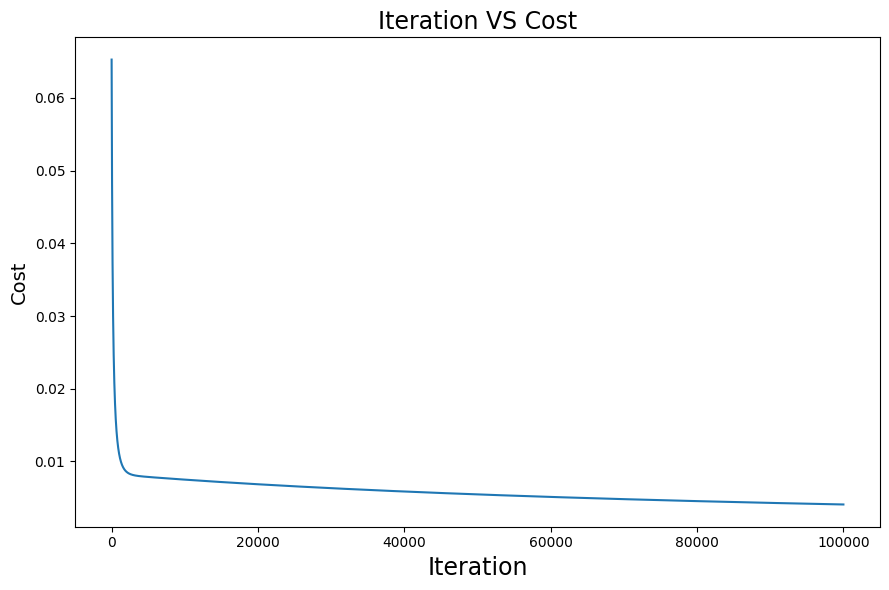

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 17)
plt.ylabel("Cost", fontsize = 14)
plt.title("Iteration VS Cost", fontsize = 17)
plt.tight_layout()
plt.show()

In [55]:
import numpy as np
def prediction(X, w, b, threshold=0.5):
  """
  Predicts binary outcomes for given input features based on logistic regression parameters.
  Arguments:
  X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d
  features.
  w (ndarray, shape (d,)): Array of weights learned via gradient descent.
  b (float): Bias learned via gradient descent.
  threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.
  Returns:
  y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
  """
  # Compute the predicted probabilities using the logistic function
  y_test_prob = np.dot(X, w) + b
  # Classify based on the threshold
  y_pred = (y_test_prob >= threshold).astype(int)
  return y_pred

In [57]:
def test_prediction():
  X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]]) # Shape (3, 2)
  w_test = np.array([1.0, -1.0]) # Shape (2,)
  b_test = 0.0 # Scalar bias
  threshold = 0.5 # Default threshold
  # Updated expected output
  expected_output = np.array([0, 1, 1])
  # Call the prediction function
  y_pred = prediction(X_test, w_test, b_test, threshold)
  # Assert that the output matches the expected output
  assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
  print("Test passed!")
test_prediction()

Test passed!


In [59]:
def evaluate_classification(y_true, y_pred):
  """
  Computes the confusion matrix, precision, recall, and F1-score for binary classification.
  Arguments:
  y_true (ndarray, shape (n,)): Ground truth binary labels (0 or 1).
  y_pred (ndarray, shape (n,)): Predicted binary labels (0 or 1).
  Returns:
  metrics (dict): A dictionary containing confusion matrix, precision, recall, and F1-score.
  """
  # Initialize confusion matrix components
  TP = np.sum((y_true == 1) & (y_pred == 1)) # True Positives
  TN = np.sum((y_true == 0) & (y_pred == 0))
  FP = np.sum((y_true == 0) & (y_pred == 1))
  FN = np.sum((y_true == 1) & (y_pred == 0))
  # Confusion matrix
  confusion_matrix = np.array([[TN, FP],
  [FN, TP]])
  # Precision, recall, and F1-score
  precision = TP / (TP + FP) if (TP + FP) > 0.0 else 0.0
  recall = TP / (TP + FN) if (TP + FN) > 0.0 else 0.0
  f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0.0 else 0.0
  # Metrics dictionary
  metrics = {
  "confusion_matrix": confusion_matrix,
  "precision": precision,
  "recall": recall,
  "f1_score": f1_score
  }
  return metrics

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_pima_diabetes = pd.read_csv(url, names=columns)

In [68]:
# Data cleaning
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)
data_pima_diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [70]:
# Train-test split
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes["Outcome"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training Logistic Regression Model:
Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


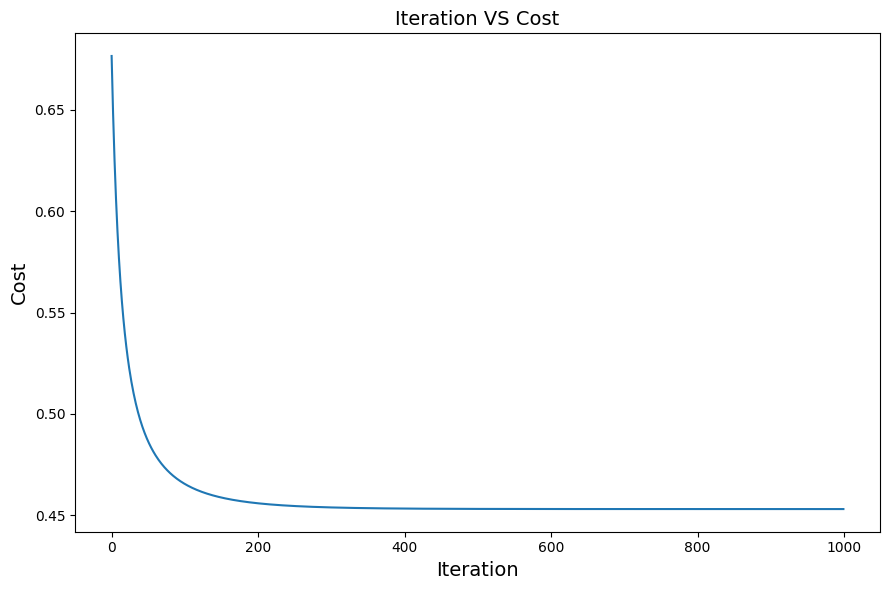

In [71]:
# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000
# Train model
print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter,
show_cost=True, show_params=False)
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Iteration VS Cost", fontsize=14)
plt.tight_layout()
plt.show()

In [72]:
# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)
# Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146



Test Accuracy: 74.03%

Confusion Matrix:
confusion_matrix
Precision: precision
Recall: recall
F1-Score: f1_score


TypeError: Image data of dtype <U16 cannot be converted to float

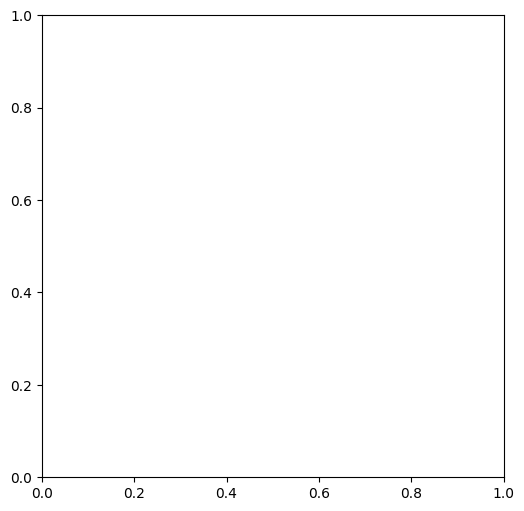

In [80]:

# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")
# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1-Score: {f1_score:}")
#Optional - Visualizing the COnfusion matrix
# Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()